Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

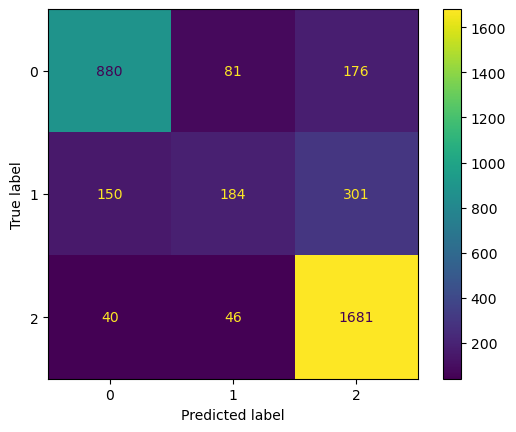



Test Result:
Accuracy Score: 76.05%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2  accuracy   macro avg  \
precision    0.789091    0.525000    0.781132  0.760452    0.698408   
recall       0.764085    0.264151    0.936652  0.760452    0.654962   
f1-score     0.776386    0.351464    0.851852  0.760452    0.659901   
support    284.000000  159.000000  442.000000  0.760452  885.000000   

           weighted avg  
precision      0.737669  
recall         0.760452  
f1-score       0.737735  
support      885.000000  
_______________________________________________
Confusion Matrix:


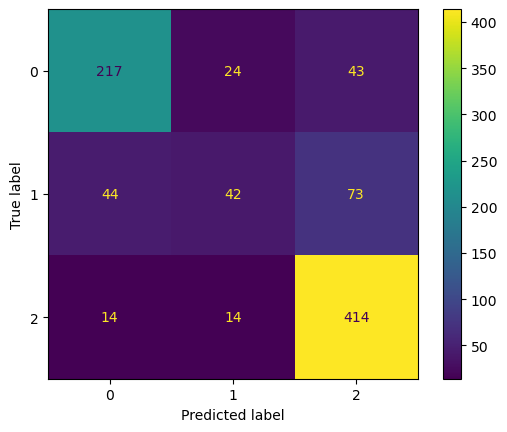

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros encontrados: {'C': 1.623776739188721, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 77.56%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1            2  accuracy    macro avg  \
precision     0.821828    0.591640     0.779221  0.775643     0.730896   
recall        0.774846    0.289764     0.950764  0.775643     0.671791   
f1-score      0.797646    0.389006     0.856487  0.775643     0.681047   
support    1137.000000  635.000000  1767.000000  0.775643  3539.000000   

           weighted avg  
precision      0.759252  
recall         0.775643  
f1-score       0.753703  
support     3539.000000  
_______________________________________________
Confusion Matrix:


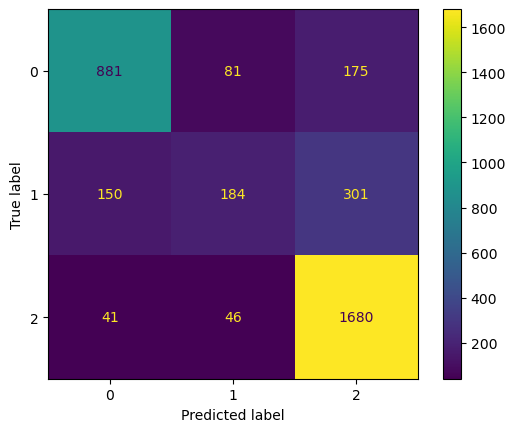



Test Result:
Accuracy Score: 76.05%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2  accuracy   macro avg  \
precision    0.789091    0.525000    0.781132  0.760452    0.698408   
recall       0.764085    0.264151    0.936652  0.760452    0.654962   
f1-score     0.776386    0.351464    0.851852  0.760452    0.659901   
support    284.000000  159.000000  442.000000  0.760452  885.000000   

           weighted avg  
precision      0.737669  
recall         0.760452  
f1-score       0.737735  
support      885.000000  
_______________________________________________
Confusion Matrix:


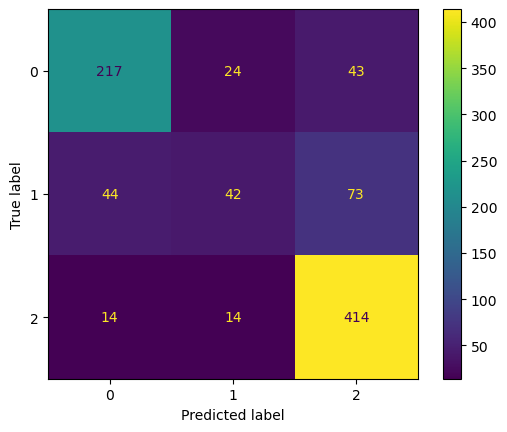

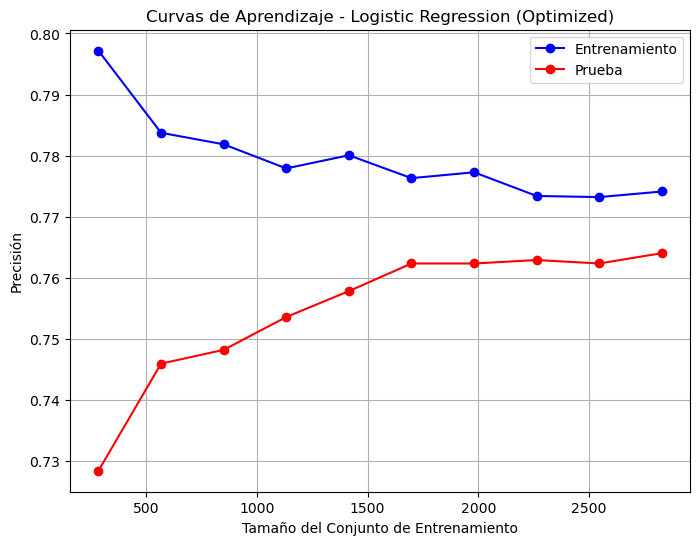

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')

# Cargar el archivo CSV.
file_path = 'data.csv'  
data = pd.read_csv(file_path, delimiter=';')

# Ver las primeras filas del conjunto de datos.
print(data.columns)
print(data.info())
print(data.describe())

# Ver la variable objetivo
print(data['Target'].unique())
print(data['Target'].value_counts())

# Codificar la variable objetivo (Target).
encoder = LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])  # ['Dropout', 'Enrolled', 'Graduate']

# Separar características (X) y objetivo (y).
X = data.drop(columns=['Target'])
y = data['Target']

# Dividir en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print('Train Result:\n================================================')
        print(f'Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%')
        print('_______________________________________________')
        print(f'CLASSIFICATION REPORT:\n{clf_report}')
        print('_______________________________________________')
        print(f'Confusion Matrix:')
        cm = confusion_matrix(y_train, pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=clf.classes_)
        disp.plot()
        plt.grid(False)
        plt.show()
        print('\n')
        
    else:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print('Test Result:\n================================================')        
        print(f'Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%')
        print('_______________________________________________')
        print(f'CLASSIFICATION REPORT:\n{clf_report}')
        print('_______________________________________________')
        print(f'Confusion Matrix:')
        cm = confusion_matrix(y_test, pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=clf.classes_)
        disp.plot()
        plt.grid(False)
        plt.show()

# Escalar las características numéricas.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo de regresión logística.
lr_clf = LogisticRegression(solver='liblinear', max_iter=200)
lr_clf.fit(X_train, y_train)

# Evaluar el modelo inicial.
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

# Búsqueda de hiperparámetros con GridSearchCV.
params = {'C': np.logspace(-4, 4, 20), 'solver': ['liblinear']}
lr_cv = GridSearchCV(lr_clf, params, scoring='accuracy', n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados.
best_params = lr_cv.best_params_
print(f'\nMejores parámetros encontrados: {best_params}')

# Ajustar el modelo con los mejores parámetros.
lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

# Evaluar el modelo optimizado.
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

# Curvas de aprendizaje con el modelo optimizado.
train_sizes, train_scores, test_scores = learning_curve(
    lr_clf, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Promediar las puntuaciones de entrenamiento y prueba.
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Graficar las curvas de aprendizaje.
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Entrenamiento', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Prueba', color='red', marker='o')
plt.title('Curvas de Aprendizaje - Logistic Regression (Optimized)')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='best')
plt.grid(True)
plt.show()
